For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook 

## Data and Setup

____
** Import numpy and pandas **

In [65]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [67]:
df = pd.read_csv('/content/911.csv')

** Check the info() of the df **

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [69]:
df.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


In [70]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


    ** Determining the top 5 zipcodes for 911 calls? **


In [71]:
df = df.drop('e', axis=1)
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [72]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END


** Determining the top 5 townships (twp) for 911 calls? **

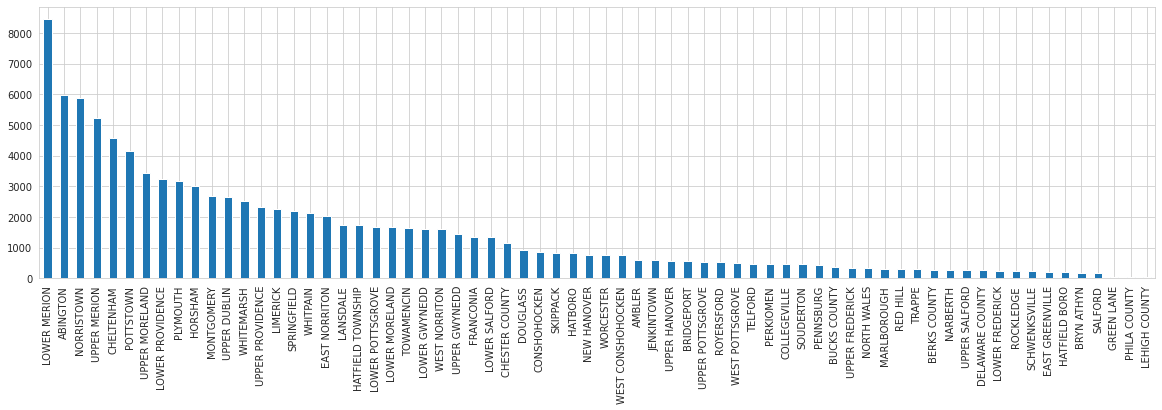

In [73]:
df['twp'].value_counts().head(5)
plt.subplots(figsize=(20,5))
df['twp'].value_counts().plot(kind='bar')

** Take a look at the 'title' column, how many unique title codes are there? **

In [74]:
df['title'].nunique()

110

## Creating new features

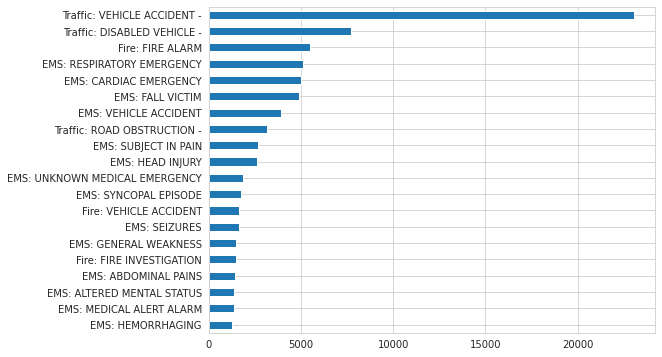

In [75]:
plt.subplots(figsize=(8,6))
df['title'].value_counts().sort_values(ascending=False).head(20).plot(kind='barh')
plt.gca().invert_yaxis()

In [76]:
# df['title'].dropna()

df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])


** Determining the most common Reason for a 911 call based off of this new column? **

In [77]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Now we are using seaborn to create a countplot of 911 calls by Reason. **

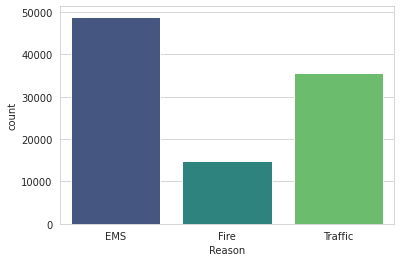

In [78]:
sns.countplot(x='Reason',data=df,palette='viridis')

___
** Now let us begin to focus on time information.**

In [79]:
#We need to purify subtype column a little bit more - replacing (+ with &) and removing - sign.
df['type'], df['subtype'] = df['title'].str.split(': ', 1).str
df = df.drop('title', axis=1) #drop 'title' columns
df['subtype'] = df['subtype'].replace({'\+': '&', '\-': ''}, regex=True).map(lambda x: x.strip())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


In [80]:
total = df['subtype'].value_counts().sort_values(ascending=False)
percent = (df['subtype'].value_counts()*100/df['subtype'].value_counts().sum()).sort_values(ascending=False)
subtype_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
subtype_data.head(10)

,Total,Percent
VEHICLE ACCIDENT,28639,28.785229
DISABLED VEHICLE,7703,7.742331
FIRE ALARM,5510,5.538134
RESPIRATORY EMERGENCY,5112,5.138102
CARDIAC EMERGENCY,5012,5.037591
FALL VICTIM,4863,4.887830
ROAD OBSTRUCTION,3144,3.160053
SUBJECT IN PAIN,2687,2.700720
HEAD INJURY,2631,2.644434
UNKNOWN MEDICAL EMERGENCY,1874,1.883569


In [81]:
type(df['timeStamp'].iloc[0])

str

In [82]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [83]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df['year'] = df['timeStamp'].dt.year
df['hour'] = df['timeStamp'].dt.hour
df['minute'] = df['timeStamp'].dt.minute
df['weekday'] = df['timeStamp'].dt.day_name
# df = df.drop('timeStamp', axis=1)

** We are using the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [84]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [85]:
df['Day of Week'] = df['Day of Week'].map(dmap)

** Now we have used seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

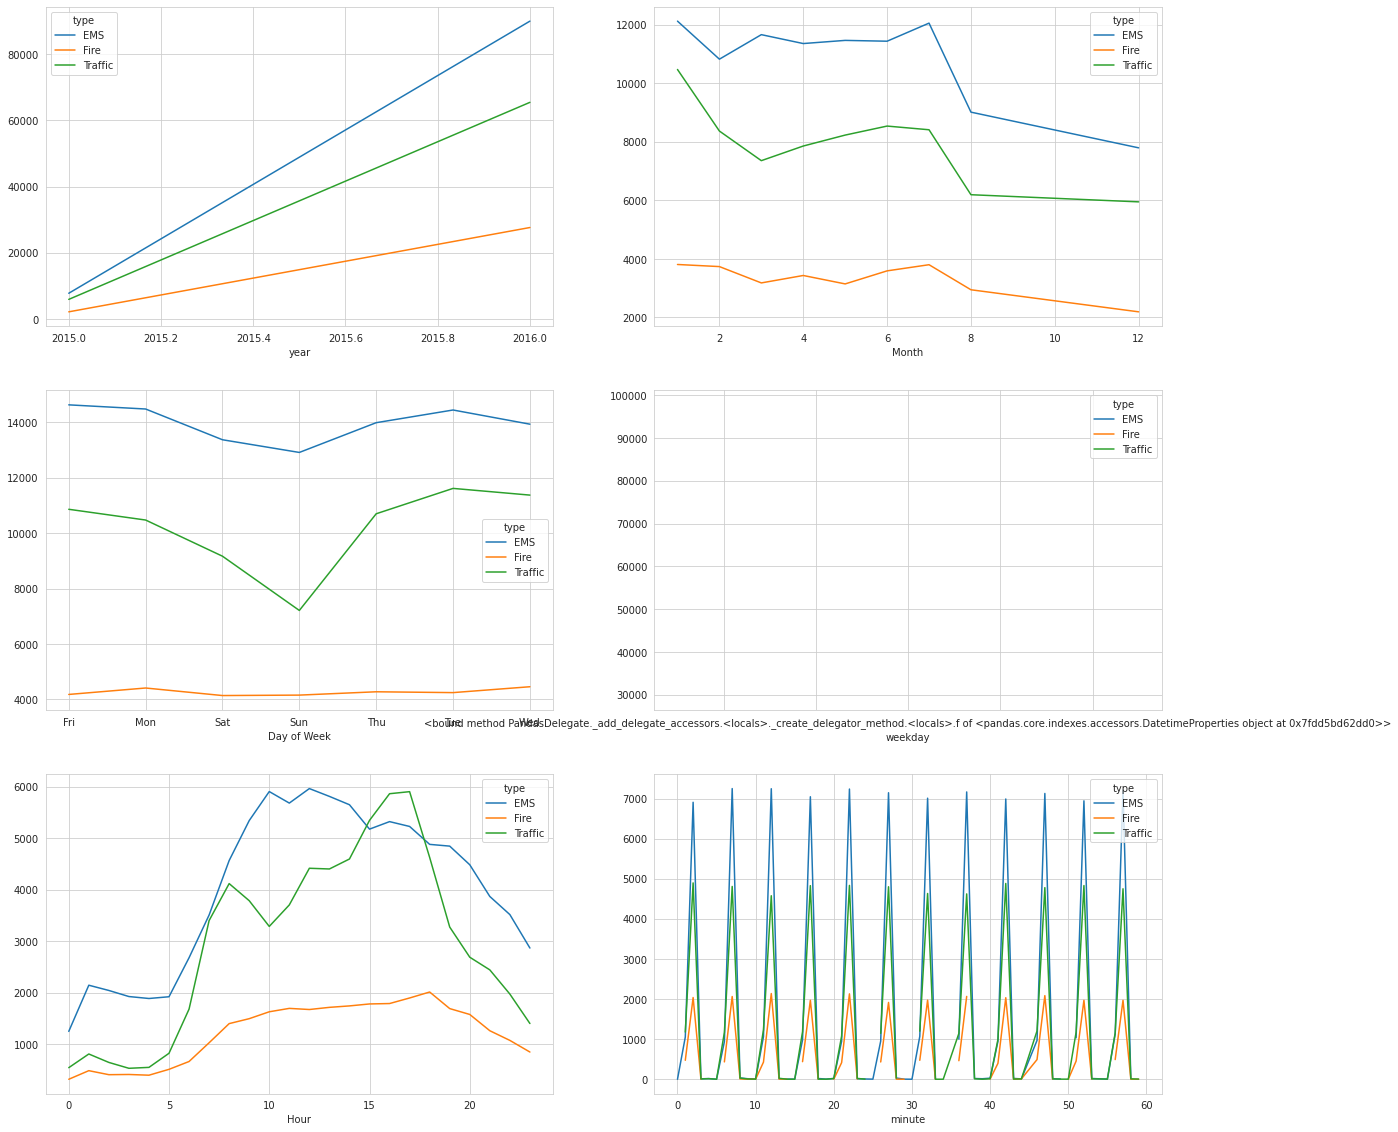

In [86]:
fig,ax = plt.subplots(3, 2, figsize=(20, 20))
df[['type','year']].pivot_table(index=['year'], columns=['type'], aggfunc=np.count_nonzero).plot(ax=ax[0][0])
df[['type','Month']].pivot_table(index=['Month'], columns=['type'], aggfunc=np.count_nonzero).plot(ax=ax[0][1])
df[['type','Day of Week']].pivot_table(index=['Day of Week'], columns=['type'], aggfunc=np.count_nonzero).plot(ax=ax[1][0])
df[['type','weekday']].pivot_table(index=['weekday'], columns=['type'], aggfunc=np.count_nonzero).plot(ax=ax[1][1])
df[['type','Hour']].pivot_table(index=['Hour'], columns=['type'], aggfunc=np.count_nonzero).plot(ax=ax[2][0])
df[['type','minute']].pivot_table(index=['minute'], columns=['type'], aggfunc=np.count_nonzero).plot(ax=ax[2][1])

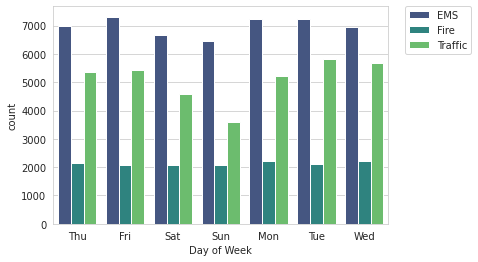

In [87]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

** Now doing the same for Month:**

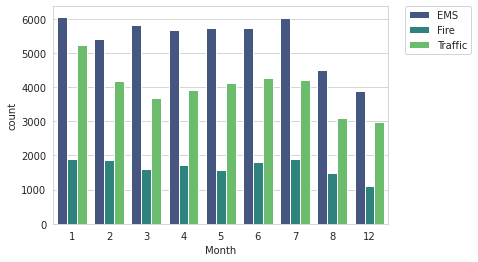

In [88]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

** We noticed some months being missing from the month column in the above plot **

In [89]:
# It is missing some months! 9,10, and 11 are not there.

In [90]:
byMonth = df.groupby('Month').count()

** Now we have created a simple plot off of the dataframe indicating the count of calls per month for better analysis. **

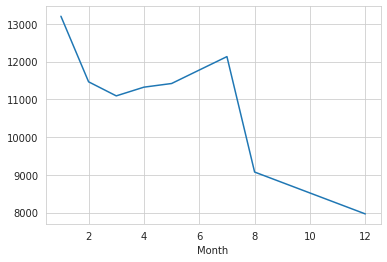

In [91]:
# Could be any column
byMonth['twp'].plot()

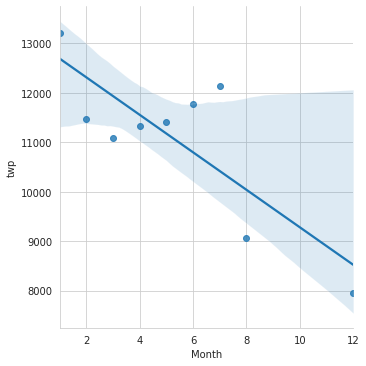

In [92]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

**Create a new column called 'Date' that contains the date from the timeStamp column.  ** 

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   lat          99492 non-null  float64       
 1   lng          99492 non-null  float64       
 2   desc         99492 non-null  object        
 3   zip          86637 non-null  float64       
 4   timeStamp    99492 non-null  datetime64[ns]
 5   twp          99449 non-null  object        
 6   addr         98973 non-null  object        
 7   Reason       99492 non-null  object        
 8   type         99492 non-null  object        
 9   subtype      99492 non-null  object        
 10  Hour         99492 non-null  int64         
 11  Month        99492 non-null  int64         
 12  Day of Week  99492 non-null  object        
 13  year         99492 non-null  int64         
 14  hour         99492 non-null  int64         
 15  minute       99492 non-null  int64         
 16  week

In [94]:
df['Date'] = df['timeStamp'].dt.day

** Now using groupby this Date column with the count() aggregate to create a plot of counts of 911 calls.**

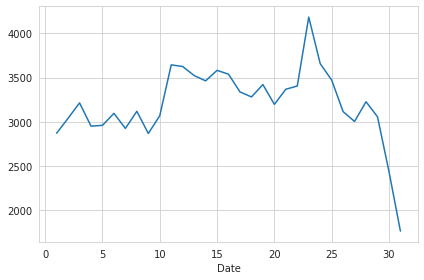

In [95]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

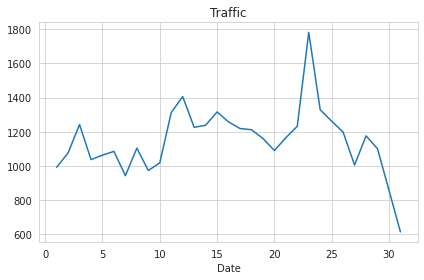

In [96]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

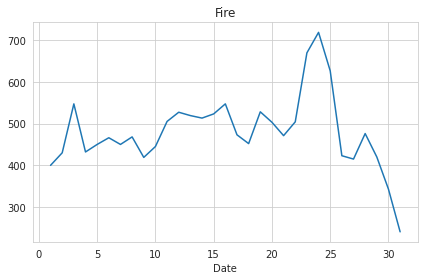

In [97]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

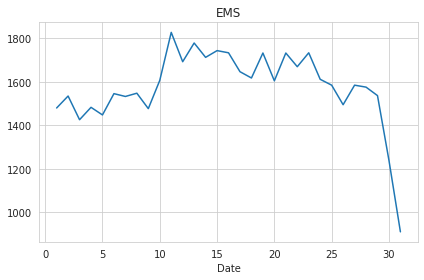

In [98]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

In [99]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,803,859,885,890,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,793,822,893,842,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,697,769,801,831,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,643,693,771,679,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,837,773,889,936,876,969,935,1013,810,698,617,553,424,354


** Now create a HeatMap using this new DataFrame. **

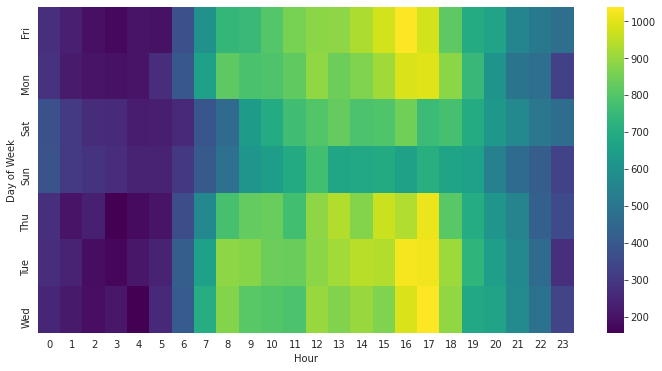

In [100]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

** Now we have created a clustermap using this DataFrame. **

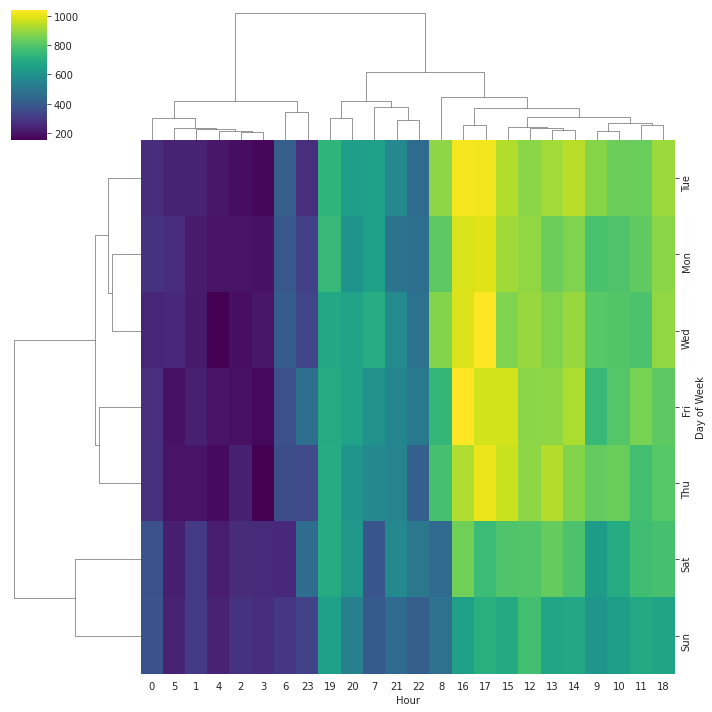

In [101]:
sns.clustermap(dayHour,cmap='viridis')

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [102]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


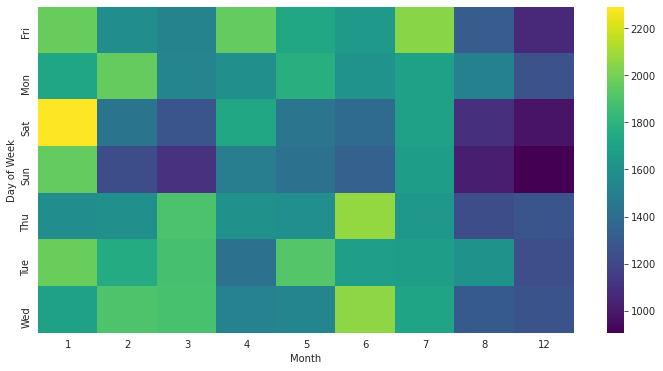

In [103]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

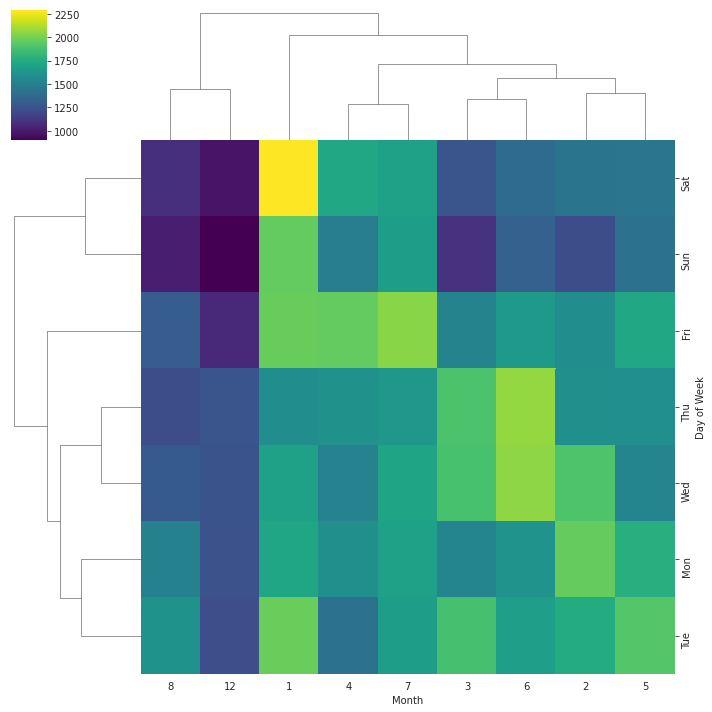

In [104]:
sns.clustermap(dayMonth,cmap='viridis')

## Geographic Analysis (lattitude-longitude)

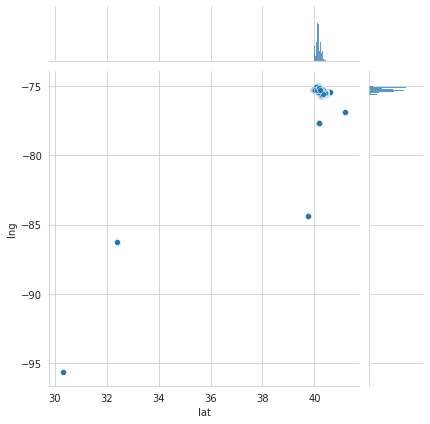

In [105]:
sns.jointplot(x='lat', y='lng', data=df, kind='scatter')

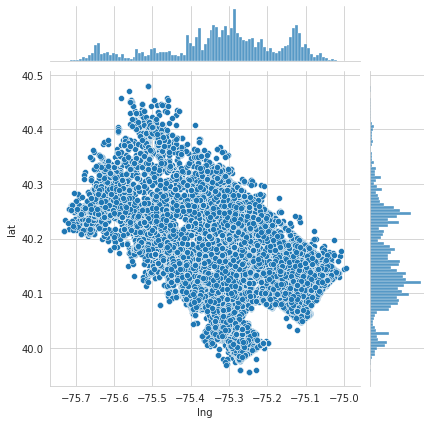

In [106]:
# Removing outliers - SD of 4 and 10 as a limit of lat and lng respectively to categorize outliers
df_geo=df[(np.abs(df["lat"]-df["lat"].mean())<=(4*df["lat"].std())) & (np.abs(df["lng"]-df["lng"].mean())<=(10*df["lng"].std()))]
df_geo.reset_index().drop('index',axis=1,inplace=True)
sns.jointplot(data=df_geo,x='lng',y='lat',kind='scatter')

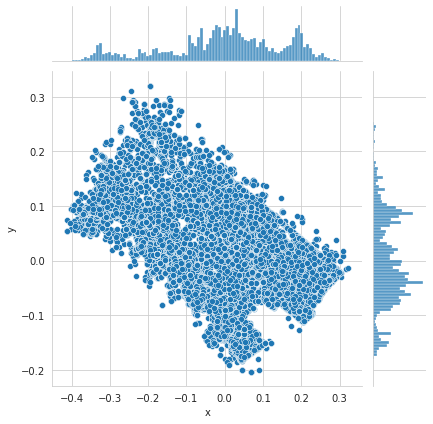

In [107]:
#standardizing the column values of lat and long
pd.options.mode.chained_assignment = None #Remove Error Message
x_mean=df_geo['lng'].mean()
y_mean=df_geo['lat'].mean()
df_geo['x']=df_geo['lng'].map(lambda v:v-x_mean)
df_geo['y']=df_geo['lat'].map(lambda v:v-y_mean)
sns.jointplot(data=df_geo,x='x',y='y',kind='scatter')

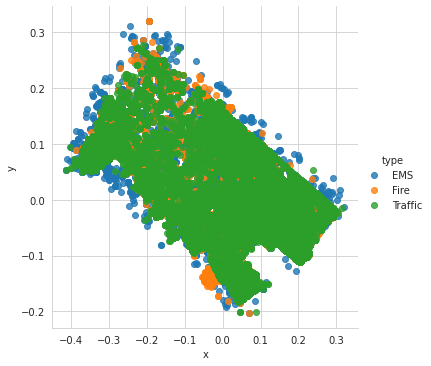

In [108]:
sns.lmplot(x='x', y='y', hue='type', data=df_geo,fit_reg=False)

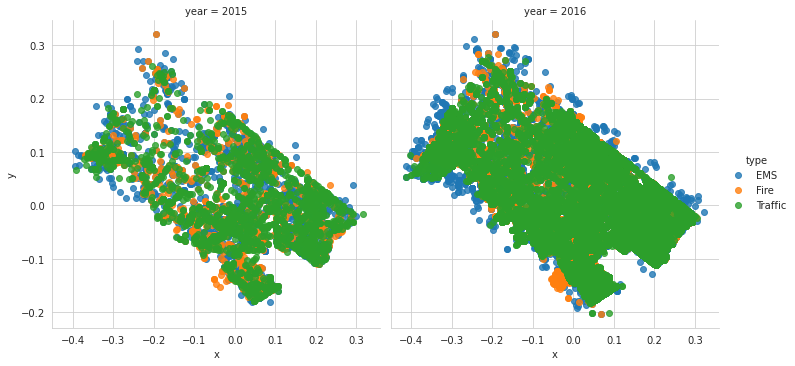

In [109]:
sns.lmplot(x='x', y='y', hue='type',col='year', data=df_geo,fit_reg=False)

Text(0.5, 1.0, 'Townships')

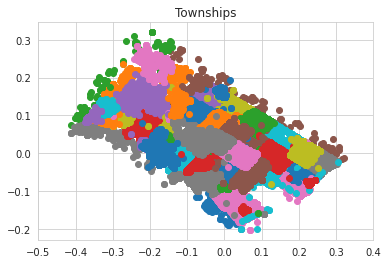

In [110]:
# Clustering lat-lng to map townships
group_town=df_geo.groupby('twp')
for name, group in group_town:
    plt.plot(group.x, group.y, marker='o', linestyle='', label=name)
plt.xlim(-0.5,0.4)
plt.title("Townships")

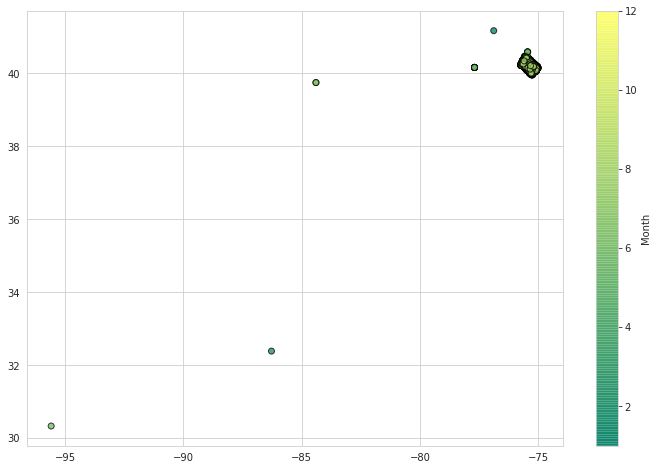

In [113]:
plt.figure(figsize=(12, 8))
plt.scatter(df.lng, df.lat, c=df.Month, cmap='summer', 
            edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('Month')

In [115]:
df['lat']=df['lat'].astype('float64')
df['lng']=df['lng'].astype('float64')
location = df['lat'].mean(), df['lng'].mean()

locationlist = df[['lat','lng']].values.tolist()
labels = df['twp'].values.tolist()

#Empty map
import folium
m = folium.Map(location=location, zoom_start=14)
#Accesing the latitude
for point in range(1,100): 
    popup = folium.Popup(labels[point], parse_html=True)
    folium.Marker(locationlist[point], popup=popup).add_to(m)

m